<a href="https://colab.research.google.com/github/molnaredom/melytanulas/blob/main/m%C3%A9lytanul%C3%A1s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dokumentáció**

https://docs.google.com/document/d/14W1howYV8TCEDbZITHbYIpD_vMSsvbOTG4_msmGppHw/edit




# Adatok beolvasása

In [217]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [218]:
# Default settings
def set_df_disp(maxrow=False, max_col=False, maxwidth=False, maxcolwidth=False):
    """
    :param maxrow:
    :param max_col:
    :param maxwidth:
    :param maxcolwidth:
    :return:
    """
    if maxrow:
        pd.set_option('display.max_rows', None)
    if max_col:
        pd.set_option('display.max_columns', None)
    if maxwidth:
        pd.set_option('display.width', None)
    if maxcolwidth:
        pd.set_option('display.max_colwidth', -1)

set_df_disp(maxwidth= True, maxcolwidth=True, max_col=True, maxrow=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


In [219]:
# data reading


data = pd.read_csv("https://raw.githubusercontent.com/molnaredom/melytanulas/main/train_data.csv", sep=',', error_bad_lines=False)

#normalize data
scaler = MinMaxScaler()
data=pd.DataFrame(scaler.fit_transform(data),
            columns=data.columns, index=data.index) 
# shuffle train data, with seed
data_shuffled = data.sample(frac=1, random_state=1)

# label
print(data_shuffled.head())

     Subject id  Jitter (local)  Jitter (local absolute)  Jitter (rap)  \
705  0.692308    0.049062        0.046388                 0.029042       
447  0.435897    0.681728        0.274632                 0.572165       
748  0.717949    0.117581        0.194259                 0.093664       
592  0.564103    0.201043        0.249267                 0.213226       
80   0.076923    0.027844        0.020793                 0.036963       

     Jitter (ppq5)  Jitter (ddp)  Shimmer (local)  Shimmer (local dB)  \
705  0.024441       0.029125      0.189127         0.323147             
447  0.412971       0.572225      0.576942         0.676853             
748  0.065745       0.093743      0.342086         0.475936             
592  0.128297       0.213217      0.324564         0.474026             
80   0.019909       0.036961      0.170029         0.263560             

     Shimmer (apq3)  Shimmer (apq5)   Shimmer (apq11)  Shimmer (dda)  \
705  0.114358        0.073997        0.17542

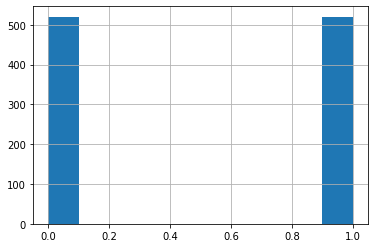

In [220]:
data_shuffled["class information"].hist( )

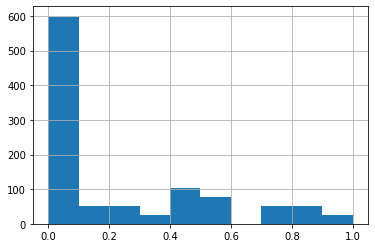

In [221]:
data_shuffled["UPDRS"].hist( )

In [222]:
# separate train data for train and validation dataframe
train = data_shuffled.iloc[:800,:]
validation = data_shuffled.iloc[800:,:]

# separate dataframes for label and features df
train_class_label = train["class information"].apply(lambda x: int(x))
train_UPDRS_label = train["UPDRS"]
train_features = train.iloc[:,1:-2]

validation_class_label = validation["class information"].apply(lambda x: int(x))
validation_UPDRS_label =validation["UPDRS"]
validation_features = validation.iloc[:,1:-2]


print("Shapes",
      "\ntrain_class_label" , train_class_label.shape,
      "\ntrain_UPDRS_label", train_UPDRS_label.shape,
      "\ntrain_features:", train_features.shape,

      "\n\nvalidation_class_label:",validation_class_label.shape,
      "\nvalidation_UPDRS_label:",validation_UPDRS_label.shape,
      "\nvalidation_features:", validation_features.shape, 
      )

Shapes 
train_class_label (800,) 
train_UPDRS_label (800,) 
train_features: (800, 26) 

validation_class_label: (240,) 
validation_UPDRS_label: (240,) 
validation_features: (240, 26)


In [241]:
# Read test data

test_data = pd.read_csv("https://raw.githubusercontent.com/molnaredom/melytanulas/main/test_data.csv",
                                       sep=',', error_bad_lines=False)
print(test_data[::-1])
test=pd.DataFrame(scaler.fit_transform(test_data[:-1]),
            columns=test_data.columns[:-1], index=test_data.index[:-1])

shuffled_test_data = test.sample(frac=1, random_state=1)

test_class_label = shuffled_test_data["class information"]
test_features =shuffled_test_data.iloc[:,1:-1] # 1-st col Subject id thrown, -1col labels ignored

print("test_data's shape:",shuffled_test_data.shape)
print(shuffled_test_data.head())

     Subject id  Jitter (local)  Jitter (local absolute)  Jitter (rap)  \
167  28          0.474           0.000031                 0.179          
166  28          0.464           0.000031                 0.195          
165  28          0.434           0.000029                 0.178          
164  28          0.311           0.000021                 0.129          
163  28          0.257           0.000018                 0.105          
162  28          0.175           0.000012                 0.072          
161  27          1.172           0.000064                 0.604          
160  27          0.353           0.000019                 0.158          
159  27          0.680           0.000036                 0.368          
158  27          0.569           0.000033                 0.286          
157  27          0.538           0.000033                 0.315          
156  27          0.464           0.000028                 0.261          
155  26          0.128           0.000

ValueError: ignored

# Baseline


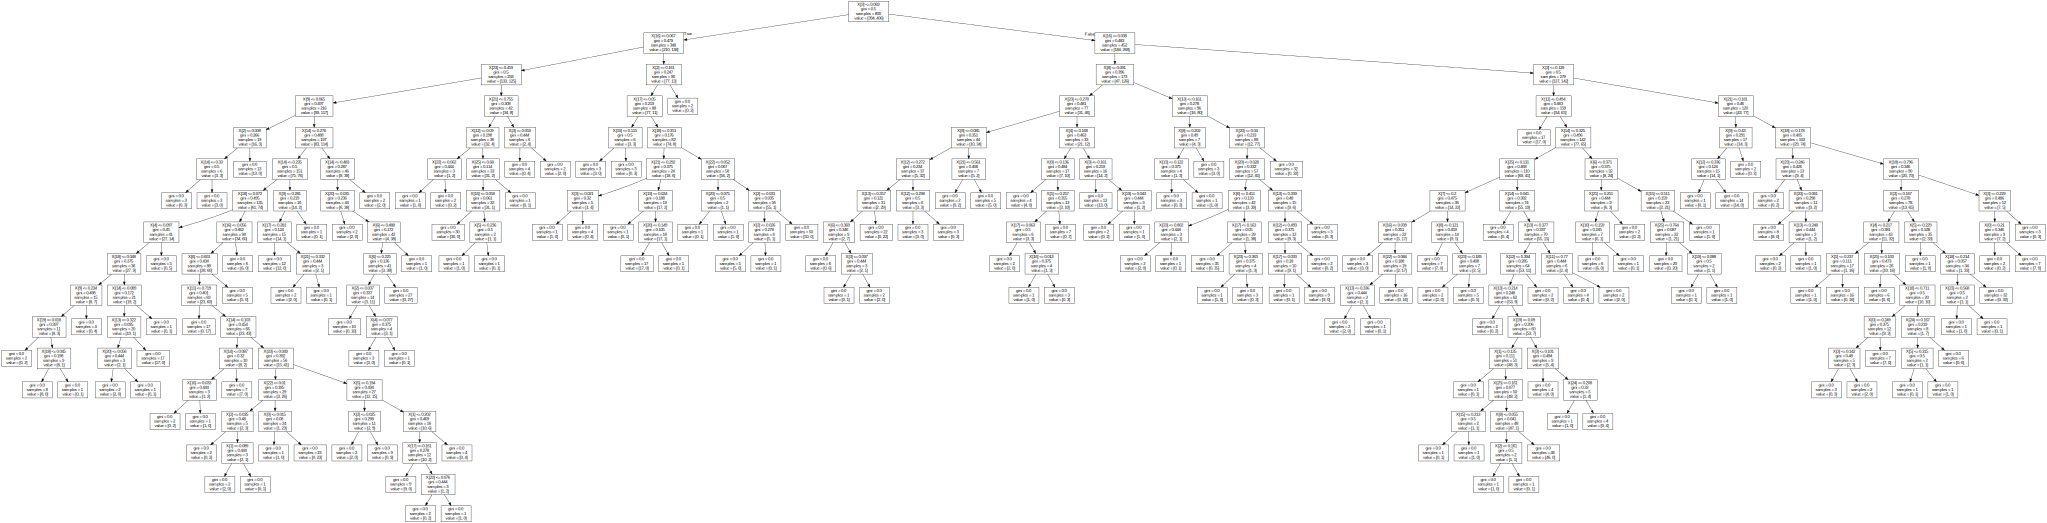

In [224]:
# decision tree
from sklearn import tree
import pydot
import graphviz
dt = tree.DecisionTreeClassifier()
dt.fit(train_features, train_class_label)


!apt-get -qq install -y graphviz && pip install -q pydot
!pip install graphviz
graphviz.Source(tree.export_graphviz(dt, out_file=None))

In [225]:
# prediction
from sklearn.metrics import classification_report
prediction = dt.predict(validation_features)
print(classification_report(validation_class_label, prediction))


              precision    recall  f1-score   support

           0       0.63      0.65      0.64       126
           1       0.60      0.58      0.59       114

    accuracy                           0.62       240
   macro avg       0.62      0.61      0.61       240
weighted avg       0.62      0.62      0.62       240



# Deep Learning

In [226]:
from tensorflow import keras
from tensorflow.keras import backend as K
# dropout egyelőre nem kell, nem csinál semmit, de kell, mert túltanul te f
# TODO multi-task tanítás (udprs & [0-1])
# TODO class
# def func(x):
#     greater = K.greater_equal(x, 0.5) #will return boolean values
#     greater = K.cast(greater, dtype=K.floatx()) #will convert bool to 0 and 1    
#     return greater 
model = keras.Sequential(
    [
        keras.layers.Dense(300, activation="relu", input_shape=(train_features.shape[-1],)),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(300, activation="relu"),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(300, activation="relu"),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(300, activation="relu"),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)
# model.add(keras.layers.Lambda(func))
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_117 (Dense)           (None, 300)               8100      
                                                                 
 dropout_96 (Dropout)        (None, 300)               0         
                                                                 
 dense_118 (Dense)           (None, 300)               90300     
                                                                 
 dropout_97 (Dropout)        (None, 300)               0         
                                                                 
 dense_119 (Dense)           (None, 300)               90300     
                                                                 
 dropout_98 (Dropout)        (None, 300)               0         
                                                                 
 dense_120 (Dense)           (None, 300)             

In [227]:
metrics = [
    keras.metrics.Accuracy(name="acc"),
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
]

model.compile(
    optimizer=keras.optimizers.Adam(1e-2), loss="binary_crossentropy", metrics=metrics
)


history = model.fit(
    train_features.to_numpy(),
    train_class_label.to_numpy(),
    batch_size=128,
    epochs=1000,
    verbose=2,
    validation_data=(validation_features.to_numpy(), validation_class_label.to_numpy()),
)
score = model.evaluate(test_features, test_class_label, verbose=2)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


# model.save_weights("/path/to/model.h5")
output = keras.layers.Lambda(lambda x: K.round(x)) (model.output)
m1 = keras.Model(model.input, output)
# m1.load_weights("/path/to/model.h5")

Epoch 1/1000
7/7 - 2s - loss: 0.8290 - acc: 0.0000e+00 - precision: 0.5145 - recall: 0.6995 - val_loss: 0.6841 - val_acc: 0.0000e+00 - val_precision: 0.5923 - val_recall: 0.6754 - 2s/epoch - 236ms/step
Epoch 2/1000
7/7 - 0s - loss: 0.6874 - acc: 0.0000e+00 - precision: 0.5634 - recall: 0.6453 - val_loss: 0.6648 - val_acc: 0.0000e+00 - val_precision: 0.5855 - val_recall: 0.7807 - 65ms/epoch - 9ms/step
Epoch 3/1000
7/7 - 0s - loss: 0.6679 - acc: 0.0000e+00 - precision: 0.5680 - recall: 0.7512 - val_loss: 0.6509 - val_acc: 0.0000e+00 - val_precision: 0.5859 - val_recall: 0.5088 - 69ms/epoch - 10ms/step
Epoch 4/1000
7/7 - 0s - loss: 0.6527 - acc: 0.0000e+00 - precision: 0.6231 - recall: 0.7167 - val_loss: 0.6225 - val_acc: 0.0000e+00 - val_precision: 0.5852 - val_recall: 0.6930 - 66ms/epoch - 9ms/step
Epoch 5/1000
7/7 - 0s - loss: 0.6460 - acc: 0.0000e+00 - precision: 0.6168 - recall: 0.7217 - val_loss: 0.6667 - val_acc: 0.0000e+00 - val_precision: 0.5217 - val_recall: 0.9474 - 74ms/epoch 

         loss      acc  precision    recall  val_loss   val_acc  \
995  0.222048  0.03250  0.937662   0.889163  1.157826  0.029167   
996  0.194367  0.03625  0.904651   0.958128  1.148206  0.025000   
997  0.221631  0.03625  0.926582   0.901478  1.105528  0.020833   
998  0.204623  0.03500  0.899061   0.943350  1.146518  0.025000   
999  0.244553  0.02000  0.905707   0.899015  1.044654  0.016667   

     val_precision  val_recall  epoch  
995  0.601562       0.675439    995    
996  0.618644       0.640351    996    
997  0.620968       0.675439    997    
998  0.604651       0.684211    998    
999  0.594595       0.578947    999    
[0.9989673] 0.0
[1.] 0.0
[0.02215175] 0.0
[1.] 0.0
[1.] 0.0
[0.00408583] 0.0
[1.] 0.0
[1.] 0.0
[5.7149555e-06] 0.0
[1.] 0.0
[0.99977666] 0.0
[0.04891562] 0.0
[0.22359467] 0.0
[1.] 0.0
[0.00067025] 0.0
[0.9997178] 0.0
[2.0319538e-07] 0.0
[0.9999999] 0.0
[0.07827444] 0.0
[0.0075839] 0.0
[0.39260152] 0.0
[0.00021418] 0.0
[0.9535019] 0.0
[1.] 0.0
[0.9612349] 

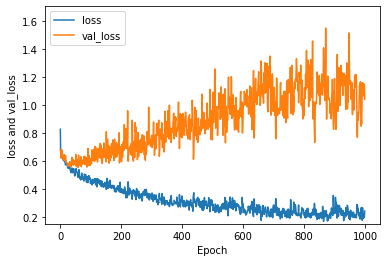

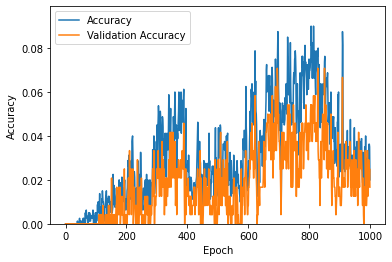

In [229]:
# Loss és Acc görbék rajzolása matplotlib-bel, erős ctrlv
import matplotlib.pyplot as plt
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
print(hist.tail())

def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('loss and val_loss')
    plt.plot(hist['epoch'], hist['loss'], label='loss')
    plt.plot(hist['epoch'], hist['val_loss'], label = 'val_loss')
    plt.legend()
    plt.ylim([(min(hist['loss'].min(), hist['val_loss'].min()))*0.9,
              (max(hist['loss'].max(), hist['val_loss'].max()))*1.1])

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['acc'],
           label='Accuracy')
    plt.plot(hist['epoch'], hist['val_acc'],
           label = 'Validation Accuracy')
    plt.legend()
    plt.ylim([(min(hist['acc'].min(), hist['val_acc'].min()))*0.9,
              (max(hist['acc'].max(), hist['val_acc'].max()))*1.1])


plot_history(history)

res = model.predict(test_features)
for a,b in zip(res, test_class_label):
  print(a,b)